In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/processed/telco_churn_features_changed.csv')
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,CommunicationType,TotalInternetServices,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,Internet Only,1,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Phone and Internet,2,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Phone and Internet,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Internet Only,3,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,Phone and Internet,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
categorical_columns = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'CommunicationType',
    'TotalInternetServices',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn'
]

numerical_columns = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

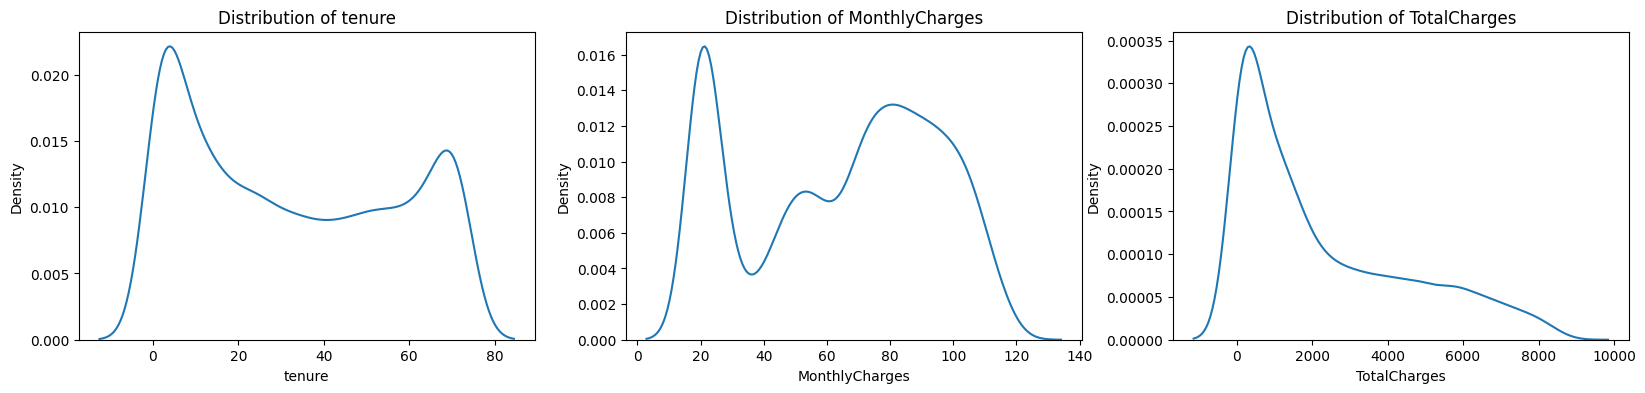

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

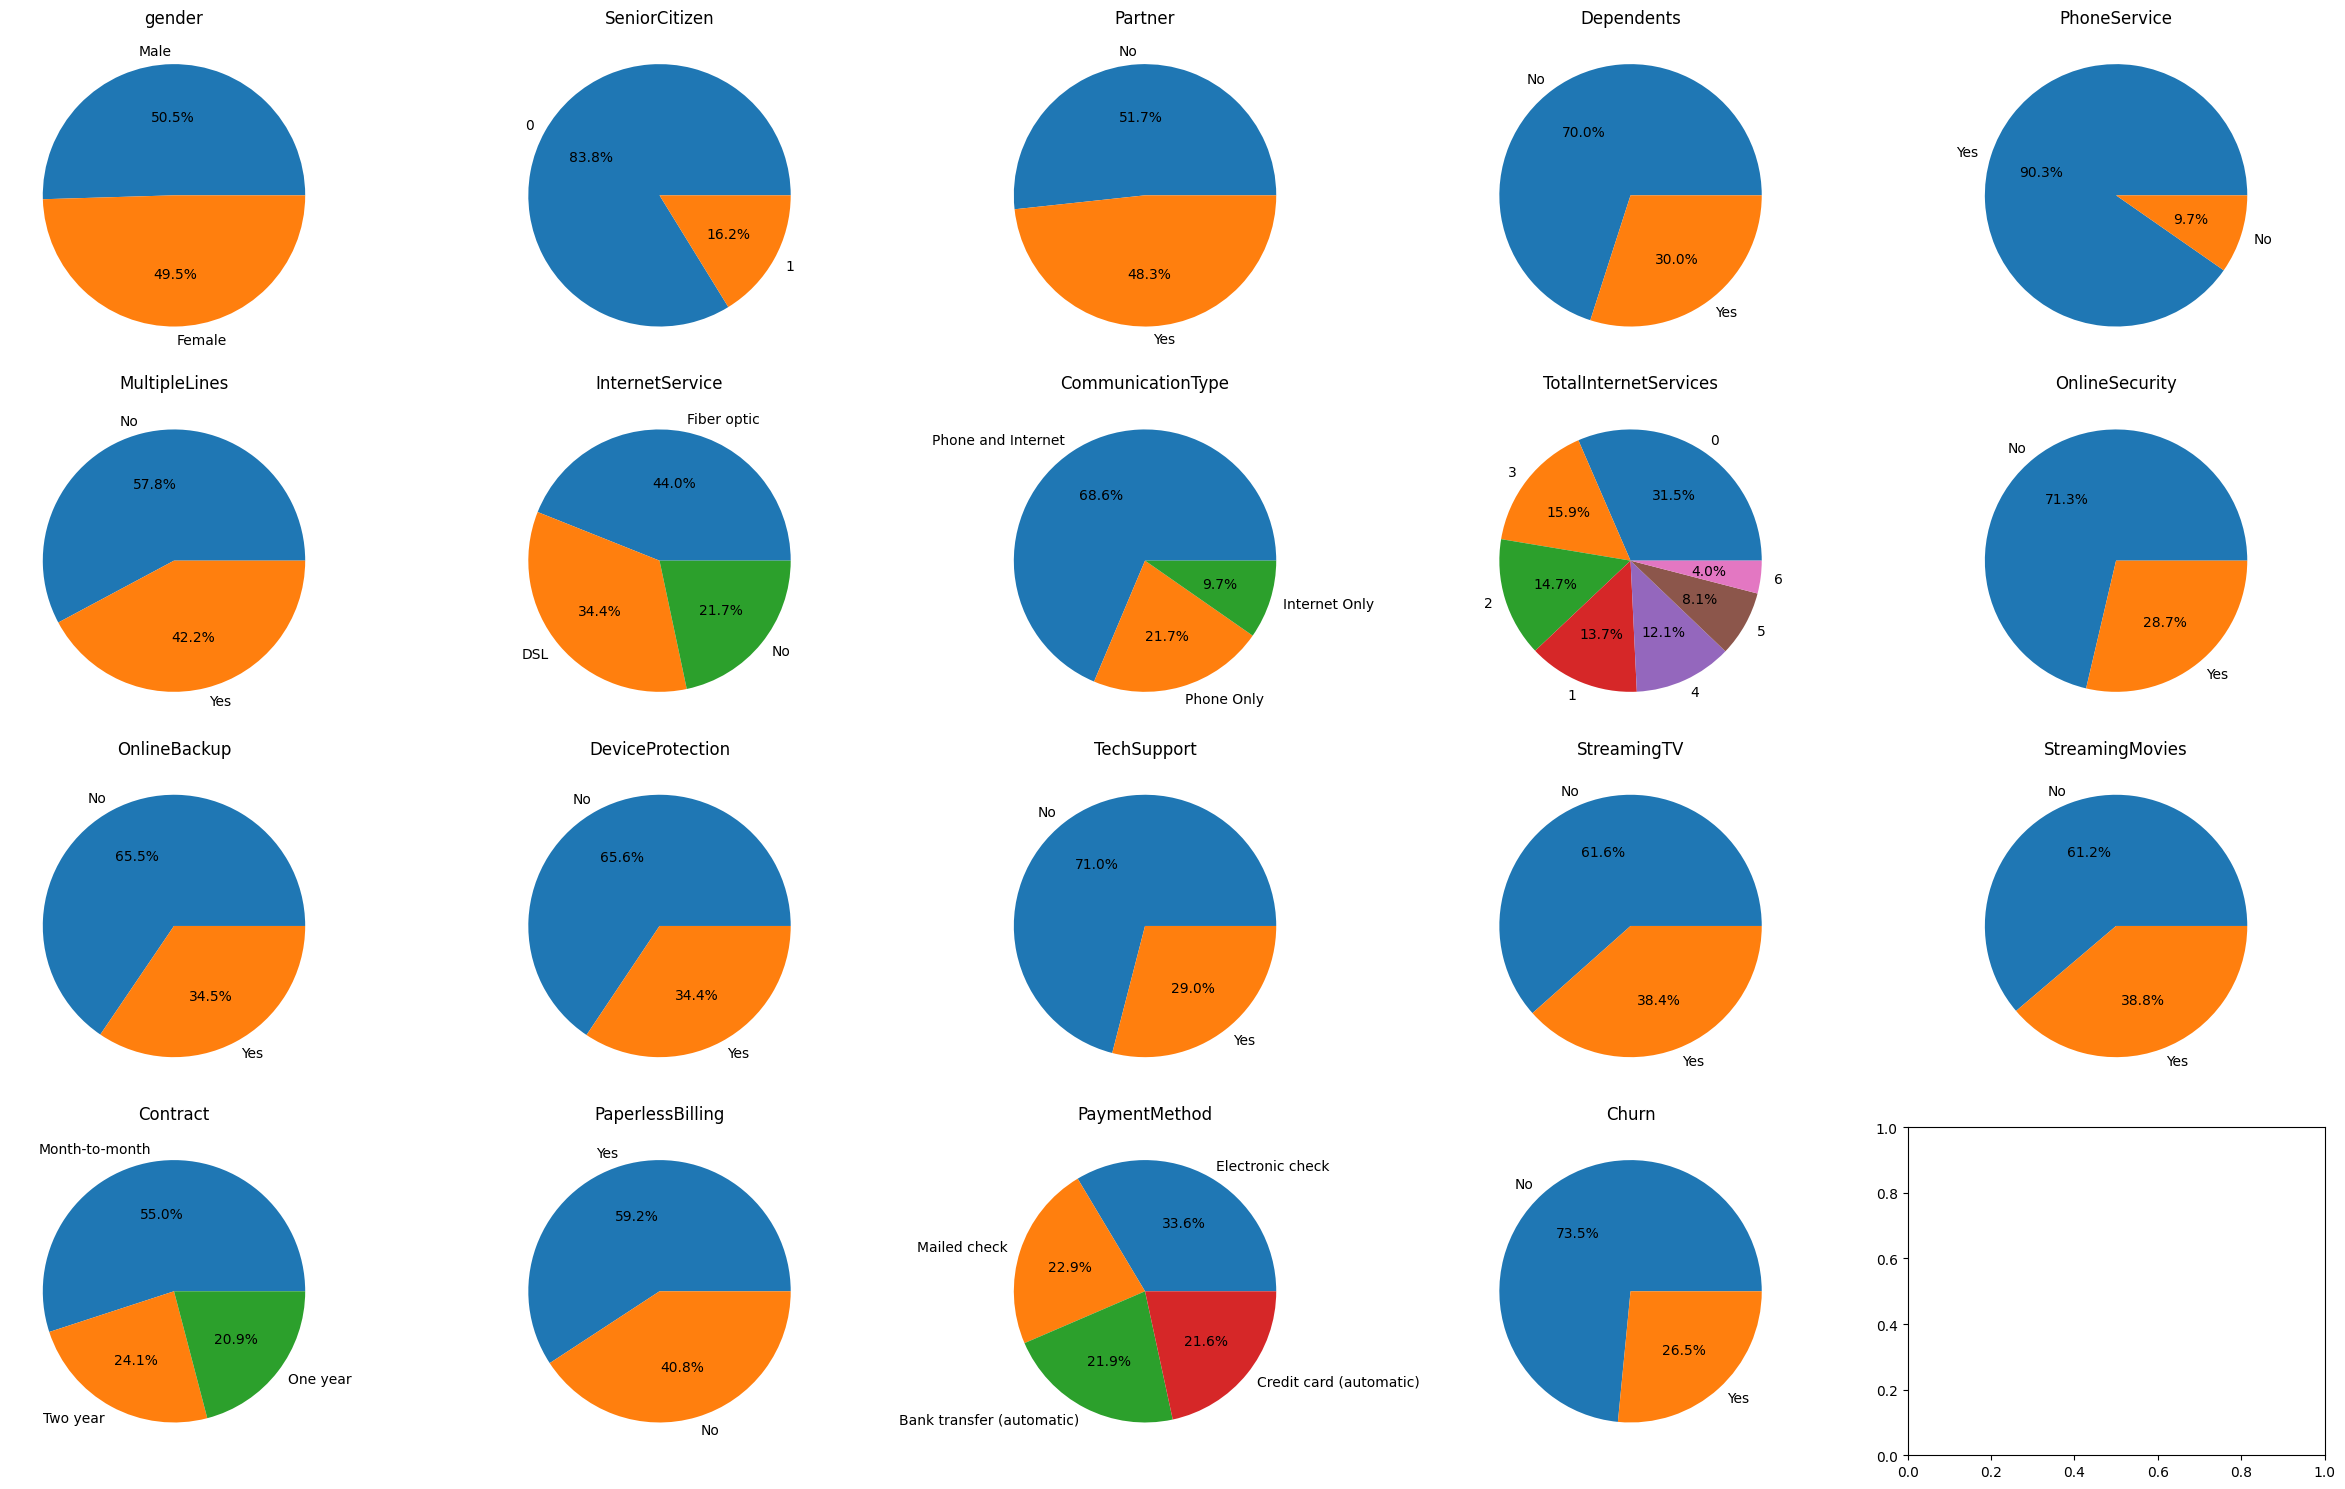

In [6]:
fig, axes = plt.subplots(4, 5, figsize=(24, 15))
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
    axes[i].set_title(column)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

<Axes: ylabel='TotalCharges'>

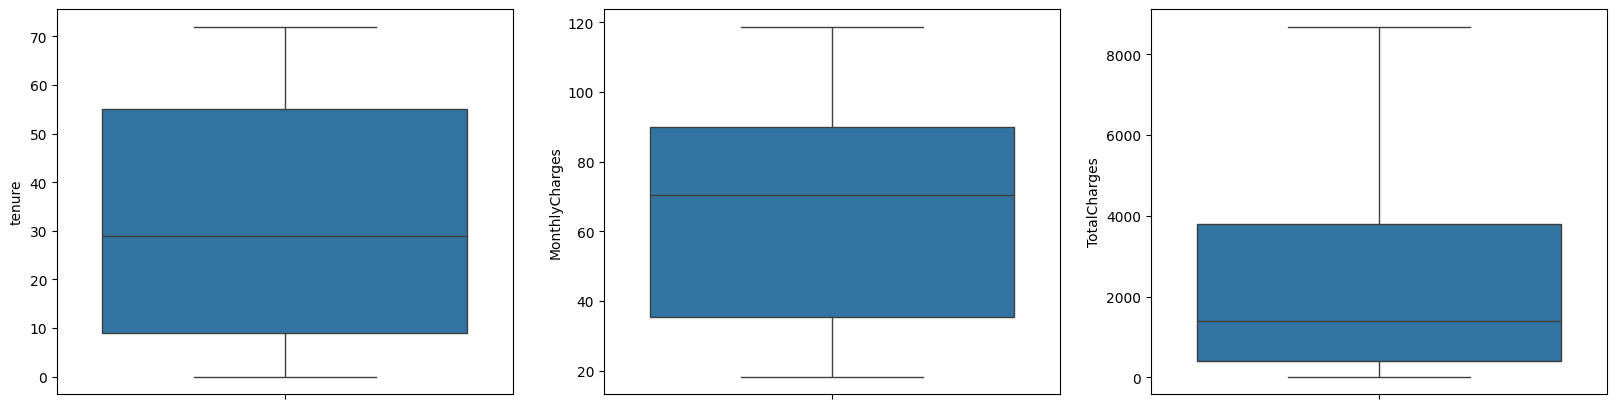

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data=df['tenure'], ax=axes[0])
sns.boxplot(data=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])

In [8]:
def find_anomalies(data):
    mean = data.mean()
    std = data.std()

    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std

    return (data < lower_limit) | (data > upper_limit)

In [9]:
for column in numerical_columns:
    outliers = find_anomalies(df[column]).sum()
    print(f'Number of outliers in {column}: {outliers}')

Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


In [10]:
def find_anomalies(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return (data < lower_limit) | (data > upper_limit)

In [11]:
for column in numerical_columns:
    outliers = find_anomalies(df[column]).sum()
    print(f'Number of outliers in {column}: {outliers}')

Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


In [12]:
df.to_csv('data/processed/telco_churn_outliers_handled.csv', index=False)